In [1]:
import pandas as pd 
import numpy as np
import dateutil
import datetime as dt
from lmfit.models import PolynomialModel

In [65]:
df = pd.read_csv("C:/Users/tenin/Documents/BIMS/papier tick/Climate model/canada/Final_temp_can.csv", sep=";") 

In [25]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,T15,T16,T17,T18,T19,T20,T21,Tmean,sd
0,1901-01-16,-17.2,-17.2,-18.1,-18.9,-19.0,-18.9,-18.0,-18.2,-17.8,...,-17.9,-17.7,-16.3,-17.6,-17.4,-17.1,-17.3,-17.5,-17.790476,0.625570
1,1901-01-16,-18.1,-17.9,-18.8,-19.4,-19.7,-19.2,-18.0,-17.9,-18.1,...,-18.2,-18.1,-17.9,-18.1,-18.0,-18.0,-18.1,-18.1,-18.371429,0.507227
2,1901-01-16,-18.5,-18.8,-19.6,-20.2,-20.7,-20.2,-19.3,-18.3,-18.8,...,-18.4,-18.2,-18.2,-18.2,-18.8,-18.5,-18.7,-18.9,-18.933333,0.684059
3,1901-01-16,-19.4,-19.8,-20.3,-20.5,-20.8,-20.3,-19.5,-18.5,-19.3,...,-18.9,-19.0,-18.7,-18.6,-19.1,-19.2,-19.0,-19.6,-19.385714,0.636423
4,1901-01-16,-20.6,-20.7,-21.1,-20.8,-20.7,-19.8,-20.2,-19.4,-19.9,...,-19.8,-19.7,-19.7,-19.4,-19.4,-19.3,-19.9,-20.1,-20.000000,0.497613


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9912 non-null   object 
 1   T1      9912 non-null   float64
 2   T2      9912 non-null   float64
 3   T3      9912 non-null   float64
 4   T4      9912 non-null   float64
 5   T5      9912 non-null   float64
 6   T6      9912 non-null   float64
 7   T7      9912 non-null   float64
 8   T8      9912 non-null   float64
 9   T9      9912 non-null   float64
 10  T10     9912 non-null   float64
 11  T11     9912 non-null   float64
 12  T12     9912 non-null   float64
 13  T13     9912 non-null   float64
 14  T14     9912 non-null   float64
 15  T15     9912 non-null   float64
 16  T16     9912 non-null   float64
 17  T17     9912 non-null   float64
 18  T18     9912 non-null   float64
 19  T19     9912 non-null   float64
 20  T20     9912 non-null   float64
 21  T21     9912 non-null   float64
 22  

In [66]:
df['date'] = df['date'].apply(dateutil.parser.parse, dayfirst=True)

In [28]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,T15,T16,T17,T18,T19,T20,T21,Tmean,sd
0,1901-01-16,-17.2,-17.2,-18.1,-18.9,-19.0,-18.9,-18.0,-18.2,-17.8,...,-17.9,-17.7,-16.3,-17.6,-17.4,-17.1,-17.3,-17.5,-17.790476,0.625570
1,1901-01-16,-18.1,-17.9,-18.8,-19.4,-19.7,-19.2,-18.0,-17.9,-18.1,...,-18.2,-18.1,-17.9,-18.1,-18.0,-18.0,-18.1,-18.1,-18.371429,0.507227
2,1901-01-16,-18.5,-18.8,-19.6,-20.2,-20.7,-20.2,-19.3,-18.3,-18.8,...,-18.4,-18.2,-18.2,-18.2,-18.8,-18.5,-18.7,-18.9,-18.933333,0.684059
3,1901-01-16,-19.4,-19.8,-20.3,-20.5,-20.8,-20.3,-19.5,-18.5,-19.3,...,-18.9,-19.0,-18.7,-18.6,-19.1,-19.2,-19.0,-19.6,-19.385714,0.636423
4,1901-01-16,-20.6,-20.7,-21.1,-20.8,-20.7,-19.8,-20.2,-19.4,-19.9,...,-19.8,-19.7,-19.7,-19.4,-19.4,-19.3,-19.9,-20.1,-20.000000,0.497613


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9912 non-null   datetime64[ns]
 1   T1      9912 non-null   float64       
 2   T2      9912 non-null   float64       
 3   T3      9912 non-null   float64       
 4   T4      9912 non-null   float64       
 5   T5      9912 non-null   float64       
 6   T6      9912 non-null   float64       
 7   T7      9912 non-null   float64       
 8   T8      9912 non-null   float64       
 9   T9      9912 non-null   float64       
 10  T10     9912 non-null   float64       
 11  T11     9912 non-null   float64       
 12  T12     9912 non-null   float64       
 13  T13     9912 non-null   float64       
 14  T14     9912 non-null   float64       
 15  T15     9912 non-null   float64       
 16  T16     9912 non-null   float64       
 17  T17     9912 non-null   float64       
 18  T18     

In [30]:
df.tail()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,T15,T16,T17,T18,T19,T20,T21,Tmean,sd
9907,2018-12-16,-9.6,-9.6,-10.1,-10.6,-11.3,-10.9,-9.9,-9.7,-10.2,...,-10.2,-10.7,-10.5,-10.2,-11.3,-11.1,-11.3,-11.7,-10.519048,0.581966
9908,2018-12-16,-9.6,-10.1,-11.0,-10.9,-11.3,-10.9,-9.9,-10.3,-11.3,...,-10.7,-11.0,-10.9,-10.8,-11.6,-11.4,-11.8,-12.1,-10.933333,0.602640
9909,2018-12-16,-11.0,-11.4,-11.7,-11.3,-11.3,-10.4,-10.6,-11.1,-11.7,...,-11.8,-11.8,-11.8,-11.7,-12.0,-11.9,-12.6,-12.8,-11.600000,0.549459
9910,2018-12-16,-12.0,-12.1,-12.3,-11.9,-11.6,-11.1,-11.3,-11.5,-12.0,...,-12.4,-12.4,-12.4,-12.4,-12.8,-12.7,-13.2,-13.5,-12.161905,0.568604
9911,2018-12-16,-12.6,-12.5,-12.0,-11.8,-11.6,-11.6,-11.8,-11.9,-12.2,...,-12.8,-12.9,-13.0,-13.0,-13.5,-13.9,-13.5,-13.6,-12.580952,0.660172


In [67]:
df=df.groupby('date').mean()

In [41]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T15,T16,T17,T18,T19,T20,T21,Tmean,sd,days_since
0,1901-01-16,-17.2,-17.2,-18.1,-18.9,-19.0,-18.9,-18.0,-18.2,-17.8,...,-17.7,-16.3,-17.6,-17.4,-17.1,-17.3,-17.5,-17.790476,0.625570,43068.0
1,1901-01-16,-18.1,-17.9,-18.8,-19.4,-19.7,-19.2,-18.0,-17.9,-18.1,...,-18.1,-17.9,-18.1,-18.0,-18.0,-18.1,-18.1,-18.371429,0.507227,43068.0
2,1901-01-16,-18.5,-18.8,-19.6,-20.2,-20.7,-20.2,-19.3,-18.3,-18.8,...,-18.2,-18.2,-18.2,-18.8,-18.5,-18.7,-18.9,-18.933333,0.684059,43068.0
3,1901-01-16,-19.4,-19.8,-20.3,-20.5,-20.8,-20.3,-19.5,-18.5,-19.3,...,-19.0,-18.7,-18.6,-19.1,-19.2,-19.0,-19.6,-19.385714,0.636423,43068.0
4,1901-01-16,-20.6,-20.7,-21.1,-20.8,-20.7,-19.8,-20.2,-19.4,-19.9,...,-19.7,-19.7,-19.4,-19.4,-19.3,-19.9,-20.1,-20.000000,0.497613,43068.0


In [68]:
df=df.reset_index()

In [69]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,T15,T16,T17,T18,T19,T20,T21,Tmean,sd
0,1901-01-16,-19.628571,-19.657143,-20.171429,-20.428571,-20.528571,-20.071429,-19.585714,-19.028571,-19.285714,...,-19.200000,-19.100000,-18.814286,-18.971429,-19.157143,-19.071429,-19.214286,-19.428571,-19.461905,0.558278
1,1901-02-15,-18.414286,-18.585714,-18.985714,-18.942857,-19.071429,-18.657143,-18.457143,-18.628571,-18.900000,...,-19.071429,-19.071429,-18.742857,-18.828571,-19.071429,-19.242857,-19.614286,-19.914286,-18.982993,0.493583
2,1901-03-16,-8.471429,-8.542857,-8.957143,-8.928571,-9.142857,-8.585714,-8.300000,-8.471429,-8.557143,...,-8.771429,-8.900000,-8.700000,-8.900000,-9.314286,-9.528571,-10.057143,-10.457143,-8.938776,0.658725
3,1901-04-16,3.300000,3.300000,3.228571,3.471429,3.400000,4.071429,4.671429,4.557143,4.585714,...,4.414286,4.128571,4.042857,3.714286,3.314286,3.028571,2.500000,2.185714,3.817687,0.827600
4,1901-05-16,13.571429,13.628571,13.471429,13.442857,12.900000,13.371429,14.000000,13.757143,13.714286,...,12.871429,12.742857,12.728571,12.442857,11.871429,11.500000,11.085714,10.800000,12.889116,0.946354


In [70]:
from lmfit.models import PolynomialModel

In [71]:
df['days_since'] = (pd.to_datetime('2018-12-16')-df.date ).astype('timedelta64[D]')

In [72]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T15,T16,T17,T18,T19,T20,T21,Tmean,sd,days_since
0,1901-01-16,-19.628571,-19.657143,-20.171429,-20.428571,-20.528571,-20.071429,-19.585714,-19.028571,-19.285714,...,-19.100000,-18.814286,-18.971429,-19.157143,-19.071429,-19.214286,-19.428571,-19.461905,0.558278,43068.0
1,1901-02-15,-18.414286,-18.585714,-18.985714,-18.942857,-19.071429,-18.657143,-18.457143,-18.628571,-18.900000,...,-19.071429,-18.742857,-18.828571,-19.071429,-19.242857,-19.614286,-19.914286,-18.982993,0.493583,43038.0
2,1901-03-16,-8.471429,-8.542857,-8.957143,-8.928571,-9.142857,-8.585714,-8.300000,-8.471429,-8.557143,...,-8.900000,-8.700000,-8.900000,-9.314286,-9.528571,-10.057143,-10.457143,-8.938776,0.658725,43009.0
3,1901-04-16,3.300000,3.300000,3.228571,3.471429,3.400000,4.071429,4.671429,4.557143,4.585714,...,4.128571,4.042857,3.714286,3.314286,3.028571,2.500000,2.185714,3.817687,0.827600,42978.0
4,1901-05-16,13.571429,13.628571,13.471429,13.442857,12.900000,13.371429,14.000000,13.757143,13.714286,...,12.742857,12.728571,12.442857,11.871429,11.500000,11.085714,10.800000,12.889116,0.946354,42948.0


In [73]:
X = df['days_since']
Y=df['Tmean']

In [74]:
X


0       43068.0
1       43038.0
2       43009.0
3       42978.0
4       42948.0
         ...   
1411      122.0
1412       91.0
1413       61.0
1414       30.0
1415        0.0
Name: days_since, Length: 1416, dtype: float64

In [75]:
mod = PolynomialModel(3)
pars = mod.guess(Y, x=X)
out = mod.fit(Y, pars, x=X)

In [76]:
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 1416
    # variables        = 4
    chi-square         = 245834.043
    reduced chi-square = 174.103430
    Akaike info crit   = 7310.05810
    Bayesian info crit = 7331.08047
[[Variables]]
    c0:  2.66670699 +/- 1.39890718 (52.46%) (init = 2.666707)
    c1: -1.5051e-04 +/- 2.8139e-04 (186.96%) (init = -0.0001505097)
    c2:  6.0207e-09 +/- 1.5185e-08 (252.22%) (init = 6.020704e-09)
    c3: -8.8472e-14 +/- 2.3176e-13 (261.96%) (init = -8.847167e-14)
[[Correlations]] (unreported correlations are < 0.250)
    C(c2, c3) = -0.986
    C(c1, c2) = -0.968
    C(c1, c3) = 0.916
    C(c0, c1) = -0.865
    C(c0, c2) = 0.744
    C(c0, c3) = -0.660


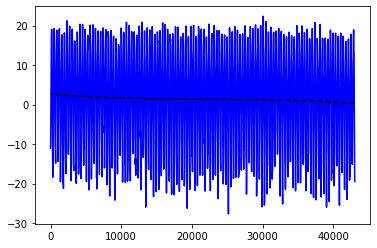

In [77]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'b')
plt.plot(X, out.best_fit, 'k--', label='fitted line')
plt.show()

In [78]:
out

In [80]:
df.set_index("date", inplace = True)

In [81]:
upsampled = df.resample('D')

In [82]:
df.head

<bound method NDFrame.head of                    T1         T2         T3         T4         T5         T6  \
date                                                                           
1901-01-16 -19.628571 -19.657143 -20.171429 -20.428571 -20.528571 -20.071429   
1901-02-15 -18.414286 -18.585714 -18.985714 -18.942857 -19.071429 -18.657143   
1901-03-16  -8.471429  -8.542857  -8.957143  -8.928571  -9.142857  -8.585714   
1901-04-16   3.300000   3.300000   3.228571   3.471429   3.400000   4.071429   
1901-05-16  13.571429  13.628571  13.471429  13.442857  12.900000  13.371429   
...               ...        ...        ...        ...        ...        ...   
2018-08-16  17.157143  17.014286  16.857143  17.157143  16.928571  17.342857   
2018-09-16   8.914286   8.842857   8.785714   9.214286   9.228571   9.714286   
2018-10-16   2.114286   1.857143   1.671429   2.071429   1.971429   2.257143   
2018-11-16  -7.600000  -8.057143  -8.514286  -8.185714  -8.171429  -7.928571   
2018-12-16

In [83]:
interpolated = upsampled.interpolate(method='polynomial',order=3)

In [84]:
print(interpolated.head(32))

                   T1         T2         T3         T4         T5         T6  \
date                                                                           
1901-01-16 -19.628571 -19.657143 -20.171429 -20.428571 -20.528571 -20.071429   
1901-01-17 -19.851175 -19.892386 -20.390803 -20.621424 -20.712487 -20.261580   
1901-01-18 -20.051824 -20.105004 -20.588715 -20.794331 -20.877436 -20.432377   
1901-01-19 -20.230928 -20.295419 -20.765551 -20.947640 -21.023733 -20.584142   
1901-01-20 -20.388894 -20.464052 -20.921697 -21.081696 -21.151693 -20.717192   
1901-01-21 -20.526131 -20.611326 -21.057541 -21.196846 -21.261629 -20.831850   
1901-01-22 -20.643047 -20.737664 -21.173468 -21.293435 -21.353856 -20.928435   
1901-01-23 -20.740051 -20.843485 -21.269866 -21.371809 -21.428688 -21.007267   
1901-01-24 -20.817550 -20.929214 -21.347120 -21.432315 -21.486439 -21.068667   
1901-01-25 -20.875954 -20.995271 -21.405617 -21.475297 -21.527423 -21.112955   
1901-01-26 -20.915669 -21.042079 -21.445

In [85]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43069 entries, 1901-01-16 to 2018-12-16
Freq: D
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T1          43069 non-null  float64
 1   T2          43069 non-null  float64
 2   T3          43069 non-null  float64
 3   T4          43069 non-null  float64
 4   T5          43069 non-null  float64
 5   T6          43069 non-null  float64
 6   T7          43069 non-null  float64
 7   T8          43069 non-null  float64
 8   T9          43069 non-null  float64
 9   T10         43069 non-null  float64
 10  T11         43069 non-null  float64
 11  T12         43069 non-null  float64
 12  T13         43069 non-null  float64
 13  T14         43069 non-null  float64
 14  T15         43069 non-null  float64
 15  T16         43069 non-null  float64
 16  T17         43069 non-null  float64
 17  T18         43069 non-null  float64
 18  T19         43069 non-null  float64
 19  

In [86]:
df.reset_index( inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1416 non-null   datetime64[ns]
 1   T1          1416 non-null   float64       
 2   T2          1416 non-null   float64       
 3   T3          1416 non-null   float64       
 4   T4          1416 non-null   float64       
 5   T5          1416 non-null   float64       
 6   T6          1416 non-null   float64       
 7   T7          1416 non-null   float64       
 8   T8          1416 non-null   float64       
 9   T9          1416 non-null   float64       
 10  T10         1416 non-null   float64       
 11  T11         1416 non-null   float64       
 12  T12         1416 non-null   float64       
 13  T13         1416 non-null   float64       
 14  T14         1416 non-null   float64       
 15  T15         1416 non-null   float64       
 16  T16         1416 non-nul

In [87]:
interpolated.reset_index( inplace=True)

In [88]:
interpolated.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T15,T16,T17,T18,T19,T20,T21,Tmean,sd,days_since
0,1901-01-16,-19.628571,-19.657143,-20.171429,-20.428571,-20.528571,-20.071429,-19.585714,-19.028571,-19.285714,...,-19.100000,-18.814286,-18.971429,-19.157143,-19.071429,-19.214286,-19.428571,-19.461905,0.558278,43068.0
1,1901-01-17,-19.851175,-19.892386,-20.390803,-20.621424,-20.712487,-20.261580,-19.792050,-19.278706,-19.542640,...,-19.369980,-19.081391,-19.230960,-19.410102,-19.338935,-19.488777,-19.701718,-19.705778,0.548395,43067.0
2,1901-01-18,-20.051824,-20.105004,-20.588715,-20.794331,-20.877436,-20.432377,-19.978556,-19.507413,-19.777604,...,-19.617980,-19.326566,-19.468990,-19.642360,-19.585246,-19.742175,-19.954190,-19.928486,0.539173,43066.0
3,1901-01-19,-20.230928,-20.295419,-20.765551,-20.947640,-21.023733,-20.584142,-20.145552,-19.715040,-19.990966,...,-19.844351,-19.550171,-19.685869,-19.854246,-19.810698,-19.974808,-20.186304,-20.130379,0.530599,43065.0
4,1901-01-20,-20.388894,-20.464052,-20.921697,-21.081696,-21.151693,-20.717192,-20.293363,-19.901936,-20.183086,...,-20.049447,-19.752564,-19.881948,-20.046086,-20.015627,-20.187007,-20.398376,-20.311802,0.522660,43064.0


In [89]:
Tmean= interpolated['Tmean']
date=interpolated['date']

In [91]:
header = ["date", "Tmean"]
interpolated.to_csv('monthly_to_daily_can.csv', columns = header, index=False)

In [94]:
df = pd.read_csv("./monthly_to_daily_can.csv", sep=",") 

In [95]:
df.head()

,date,Tmean
0,1901-01-16,-19.461905
1,1901-01-17,-19.705778
2,1901-01-18,-19.928486
3,1901-01-19,-20.130379
4,1901-01-20,-20.311802
